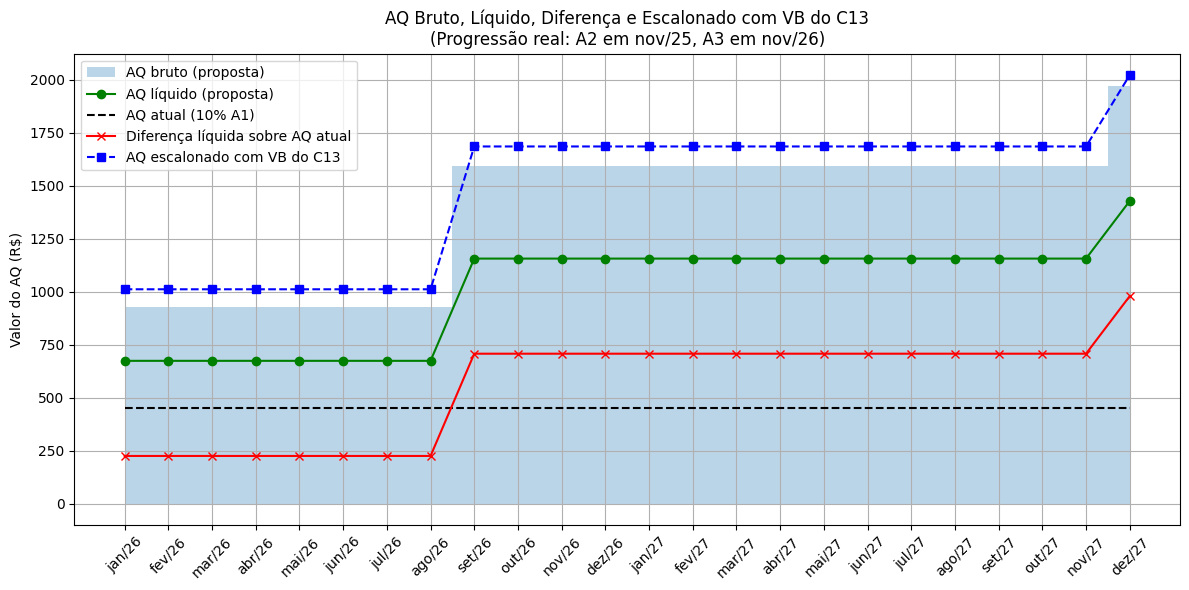

In [19]:
import matplotlib.pyplot as plt

# VBs por padrão
vb_a1 = 6188.61
vb_a2 = 6374.26
vb_a3 = 6561.57
vb_c13 = 9292.14  # teto da carreira de Analista Judiciário

# Fator líquido estimado após descontos
fator_liquido = 0.725

# Percentuais escalonados conforme proposta (8 meses com 15%, 15 meses com 25%, 1 mês com 30%)
percentuais_progressao = [0.15]*8 + [0.25]*15 + [0.30]

# Progressão real: A1 até out/2025, A2 nov/2025 a out/2026, A3 a partir de nov/2026
vbs_progressao_real = [vb_a1]*8 + [vb_a2]*15 + [vb_a3]

# AQ líquido real (com sua progressão de padrão)
valores_liquidos_progressao = [
    round(vb * pct * fator_liquido, 2)
    for vb, pct in zip(vbs_progressao_real, percentuais_progressao)
]

# AQ bruto (sem descontos, mesmo escalonamento)
valores_brutos_progressao = [
    round(vb * pct, 2)
    for vb, pct in zip(vbs_progressao_real, percentuais_progressao)
]

# AQ atual líquido com 10% do VB A1 (fixo)
valor_atual = round(vb_a1 * 0.10 * fator_liquido, 2)
base_atual = [valor_atual] * len(percentuais_progressao)

# Diferença líquida entre o escalonado real e o AQ atual
diferenca_liquida = [liq - valor_atual for liq in valores_liquidos_progressao]

# AQ escalonado como se já estivesse no C13
linha_c13_escalonada = [
    round(vb_c13 * pct * fator_liquido, 2)
    for pct in percentuais_progressao
]

# Eixo X: meses de jan/26 a dez/27
meses = [
    "jan/26", "fev/26", "mar/26", "abr/26", "mai/26", "jun/26", "jul/26", "ago/26",
    "set/26", "out/26", "nov/26", "dez/26",
    "jan/27", "fev/27", "mar/27", "abr/27", "mai/27", "jun/27", "jul/27", "ago/27",
    "set/27", "out/27", "nov/27", "dez/27"
]

# === PLOT ===
plt.figure(figsize=(12, 6))

# Área chapada: AQ bruto
plt.fill_between(meses, valores_brutos_progressao, label="AQ bruto (proposta)", alpha=0.3, step='mid')

# Linha laranja: AQ líquido real (com sua progressão A1→A2→A3)
plt.plot(meses, valores_liquidos_progressao, label="AQ líquido (proposta)", marker='o', color='green')

# Linha cinza: AQ atual fixo com 10% A1
plt.plot(meses, base_atual, label="AQ atual (10% A1)", linestyle='--', color='black')

# Linha vermelha: diferença líquida mensal entre proposta e AQ atual
plt.plot(meses, diferenca_liquida, label="Diferença líquida sobre AQ atual", linestyle='-', marker='x', color='red')

# Linha verde: AQ escalonado com VB do C13 (cenário ideal)
plt.plot(meses, linha_c13_escalonada, label="AQ escalonado com VB do C13", linestyle='--', color='blue', marker='s')

# Estilização final
plt.xticks(rotation=45)
plt.ylabel("Valor do AQ (R$)")
plt.title("AQ Bruto, Líquido, Diferença e Escalonado com VB do C13\n(Progressão real: A2 em nov/25, A3 em nov/26)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
